## import dataset
Import dataset

Create label

Drop rows with Nans in label

Change column surgmonth to numeric

In [ ]:
import pandas as pd
from IPython.display import display

In [68]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
data.head()

,PATIENTID,PRIMPROCID,LTFCALC,SURGMONTH,SURGYEAR,SURGWEEKDAY,SSDI_MORTYEAR,VQI_MORTYEAR,ALL_MORTYEAR,DEAD,GENDER,RACE,ETHNICITY,HTIN,HTCM,WTLB,WTKG,AGE,AGECAT,LOS,LOS2,PROC_SURVIVALDAYS,LATESTLTFDAYS,PRIMARYINSURER,DCSTATUS,DCNOTHOME,TRANSFER,TRANSFERALL,SMOKING,ANYSMOKE,HTN,DIABETES,ANYDM,HBA1C,CAD,ANYCAD,CABG,PCI,ANYCBGPCI,CHF,ANYCHF,COPD,ANYCOPD,DIALYSIS,CREATININE,CREATININE_UMOL,YNCREAT,STRESS,ALLSTRESS,LIVING,PREOPAMBUL,ASACLASS,HGB,HEMO_L,HXBYPASS,HXCEACAS,HXANEURREP,HXPVI,HXMAJORAMP,PRE_OP_ASA,PRE_OP_P2Y12_ANTAGONIST,ASAP2Y12ANT,PRE_OP_STATIN,PRE_OP_BETA_BLOCKER,ANYBB,PRE_OP_ACE_I_ARB,PRE_OP_ANTICOAGULANT,INDICATIONRT,INDICATIONLT,PATHOLOGYRT,PATHOLOGYLT,PINBYPASSR,PINBYPASSL,PINPTASTENTR,PINPTASTENTL,PLEGBYPASSR,PLEGBYPASSL,PLEGPTASTENTR,PLEGPTASTENTL,PMAJAMPR,PMAJAMPL,PMINAMPR,PMINAMPL,PREOPABIR,PREOPABIL,PREOPTBIR,PREOPTBIL,PREDUPLEX,PREMRA,PRECTA,PREARTERIO,PREVEINMAP,URGENCY,ANESTHESIA,SIDE,SKINPREP,GRAFTORIGIN,GRAFTRECIPIENT,GRAFTVEINTYPE,VEINSEGS,PROSTHETIC,EBL,GROIN_INCISION,TOTALPROCTIME,VEIN_HARVEST_INCISION,VEIN_GRAFT_LOCATION,VEINCUFF,SEQGRAFT,CCPVI,CCENDAR,CCSUPRAINGUINAL,DOPPLER,DUPLEX,ARTERIOGRAM,WOUND,GRFTINFECTION,TRANSFUSION,YNTRANSFX,NEWMI,ANYPOMI,DYSRHYTHMIA,CHF2,RESPIRATORY,CHGRENAL,STROKE,IPSAMP,DCPATENCY,DCPATJUDGE,RTOR,ORBLEED,ORTHROMB,ORINFECTION,ORREVISION,POCX_INFRA,DISCHARGE_ASA,DISCHARGE_STATIN,DISCHARGE_P2Y12_ANTAGONIST,DISCHARGE_BETA_BLOCKER,DISCHARGE_ACE_I_ARB,DISCHARGE_ANTICOAGULANT,POSTOPABIR,POSTOPABIL,POSTOPTBIR,POSTOPTBIL,DCAMBUL,ABXSTART,ABXSTOP,ABXCEPH,SURGEONID,CENTERID,REGIONID,CONTACTBY,LTFSMOKING,LTFSTATUS,MORTCAUSE,LTF_ASA,LTF_P2Y12_ANTAGONIST,LTF_ANTICOAGULANT,LTF_BETA_BLOCKER,LTF_STATIN,LTF_ACE_I_ARB,LTFCURRAMB,LTFIPSSYMP,LTFCURPATENCY,LTFCURPATENCYDAYS,LTFPATJUDGE,LTFIPSABI,LTFIPSTBI,LTFINFECTION,LTFREVISION,LTFREVISIONDAYS,LTFTHROMBREVISION,LTFTHROMBREVISIONDAYS,LTFMAJAMP,LTFMAJAMPDAYS,STROKEORDEATH
0,6,13428,1,DEC,2009,6,NaN,NaN,NaN,0,2.0,5.0,0.0,64.0,163.0,211.0,96.0,61,4,5.0,5.0,1898,305.0,NaN,1.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.9,79.56,0.0,2.0,2.0,1.0,1.0,3.0,13.8,138.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.66,0.49,0.42,1.0,0.0,0.0,1.0,1.0,1.0,3.0,2.0,NaN,2.0,3.0,1.0,1.0,0.0,300.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1.0,NaN,0.0,0.98,0.94,0.60,0.46,1.0,1.0,1.0,1.0,9,1,21.0,1.0,1.0,1.0,NaN,1.0,0.0,NaN,1.0,1.0,NaN,1.0,0.0,1.0,305.0,4.0,0.90,0.55,0.0,0.0,305.0,0.0,305.0,0.0,305.0,NaN
1,6,38228,0,NOV,2011,6,NaN,NaN,NaN,0,2.0,5.0,0.0,66.0,168.0,209.0,95.0,63,4,3.0,3.0,1205,53.0,NaN,1.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,6.9,1.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,88.40,0.0,0.0,0.0,1.0,1.0,3.0,11.0,110.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,NaN,NaN,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.4,0.95,0.25,0.70,1.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,5.0,4.0,5.0,1.0,0.0,250.0,0.0,330.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,1.0,NaN,0.0,0.90,0.87,0.64,0.54,1.0,1.0,1.0,1.0,9,1,21.0,1.0,1.0,1.0,NaN,1.0,0.0,NaN,1.0,1.0,NaN,1.0,0.0,1.0,53.0,4.0,0.92,0.64,0.0,0.0,53.0,0.0,53.0,0.0,53.0,0.0
2,8,6,0,FEB,2009,3,NaN,NaN,NaN,0,1.0,5.0,0.0,75.0,191.0,279.0,127.0,68,4,17.0,9.0,2202,9.0,NaN,3.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.3,114.92,0.0,0.0,0.0,1.0,1.0,3.0,12.3,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,NaN,NaN,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,1.0,3.0,1.0,NaN,5.0,7.0,1.0,1.0,0.0,150.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,2.0,1.0,0.0,1.0,8,1,21.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [69]:
df.shape

(22952, 176)

In [74]:
df = data.dropna(axis=0, how='any', thresh=None, subset=['CHGRENAL'], inplace=False)
df['AKI'] = df['CHGRENAL'].apply(lambda x: 0 if x == 0 else 1)

/Users/Chen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [75]:
df['SURGMONTH'] = df['SURGMONTH'].map({'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
                                       'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12})

/Users/Chen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## df_demographics
drop nans

drop negative values

chi2 to select best features

In [119]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [120]:
df_demographics = df[[#General Features
                      'PATIENTID','PRIMPROCID', 'LTFCALC', 'SURGMONTH', 'SURGYEAR', 'SURGWEEKDAY',
                      'DEAD', 'GENDER', 'RACE', 'ETHNICITY', 'HTCM', 'WTKG', 'AGECAT', 'LOS', 'LOS2',
                      'PROC_SURVIVALDAYS', 'LATESTLTFDAYS', 'PRIMARYINSURER', 'DCNOTHOME', 'TRANSFERALL',
                      #Demographic Features
                      'ANYSMOKE', 'HTN', 'ANYDM', 'ANYCAD', 'ANYCBGPCI', 'ANYCHF', 'ANYCOPD', 'DIALYSIS', 
                      'YNCREAT', 'ALLSTRESS', 'LIVING', 'PREOPAMBUL', 'ASACLASS', 'HGB', 'HXBYPASS', 'HXCEACAS', 
                      'HXANEURREP', 'HXPVI', 'HXMAJORAMP', 'ASAP2Y12ANT', 'PRE_OP_STATIN', 'ANYBB', 
                      'PRE_OP_ACE_I_ARB', 'PRE_OP_ANTICOAGULANT',
                      #Label
                      'AKI']]

In [121]:
nan_percentage = df_demographics.isna().sum()/df_demographics.shape[0]

In [122]:
nan_percentage.sort_values()

PATIENTID               0.000000
LATESTLTFDAYS           0.000000
PROC_SURVIVALDAYS       0.000000
AGECAT                  0.000000
DEAD                    0.000000
AKI                     0.000000
SURGYEAR                0.000000
SURGWEEKDAY             0.000000
SURGMONTH               0.000000
LTFCALC                 0.000000
PRIMPROCID              0.000000
LOS2                    0.000044
LOS                     0.000087
RACE                    0.000131
GENDER                  0.000305
HTN                     0.000392
DIALYSIS                0.000523
HXBYPASS                0.000566
ANYDM                   0.000566
HXANEURREP              0.000697
ANYCHF                  0.000741
ANYCOPD                 0.000871
HXPVI                   0.001089
ANYCAD                  0.001438
ASAP2Y12ANT             0.001525
HXMAJORAMP              0.001525
DCNOTHOME               0.001568
PRE_OP_STATIN           0.001656
ANYSMOKE                0.001699
ANYBB                   0.001917
ANYCBGPCI 

In [123]:
df_demographics = df_demographics.dropna()

In [124]:
df_demographics.shape

(13534, 45)

In [125]:
df_demographics[(df_demographics < 0).any(1)]

,PATIENTID,PRIMPROCID,LTFCALC,SURGMONTH,SURGYEAR,SURGWEEKDAY,DEAD,GENDER,RACE,ETHNICITY,HTCM,WTKG,AGECAT,LOS,LOS2,PROC_SURVIVALDAYS,LATESTLTFDAYS,PRIMARYINSURER,DCNOTHOME,TRANSFERALL,ANYSMOKE,HTN,ANYDM,ANYCAD,ANYCBGPCI,ANYCHF,ANYCOPD,DIALYSIS,YNCREAT,ALLSTRESS,LIVING,PREOPAMBUL,ASACLASS,HGB,HXBYPASS,HXCEACAS,HXANEURREP,HXPVI,HXMAJORAMP,ASAP2Y12ANT,PRE_OP_STATIN,ANYBB,PRE_OP_ACE_I_ARB,PRE_OP_ANTICOAGULANT,AKI
14057,120653,119365,1,7,2011,3,1,1.0,5.0,0.0,180.0,114.0,3,8.0,3.0,-2532,-2532.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,12.5,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0


In [126]:
df_demographics = df_demographics.drop([14057])
df_demographics.shape

(13533, 45)

In [127]:
y_dempgraphics = df_demographics['AKI']

In [128]:
X_demographics = df_demographics.drop(columns = ['AKI'])
X_demographics.shape

(13533, 44)

In [103]:
X_demographics[(X_demographics < 0).any(1)]

,PATIENTID,PRIMPROCID,LTFCALC,SURGMONTH,SURGYEAR,SURGWEEKDAY,DEAD,GENDER,RACE,ETHNICITY,HTCM,WTKG,AGECAT,LOS,LOS2,PROC_SURVIVALDAYS,LATESTLTFDAYS,PRIMARYINSURER,DCNOTHOME,TRANSFERALL,ANYSMOKE,HTN,ANYDM,ANYCAD,ANYCBGPCI,ANYCHF,ANYCOPD,DIALYSIS,YNCREAT,ALLSTRESS,LIVING,PREOPAMBUL,ASACLASS,HGB,HXBYPASS,HXCEACAS,HXANEURREP,HXPVI,HXMAJORAMP,ASAP2Y12ANT,PRE_OP_STATIN,ANYBB,PRE_OP_ACE_I_ARB,PRE_OP_ANTICOAGULANT
14057,120653,119365,1,7,2011,3,1,1.0,5.0,0.0,180.0,114.0,3,8.0,3.0,-2532,-2532.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,12.5,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [106]:
X_demographics = X_demographics.drop([14057])
X_demographics.shape

(13533, 44)

In [134]:
X_demographics_20 = pd.DataFrame(SelectKBest(chi2, k=20).fit_transform(X_demographics, y_dempgraphics))

In [135]:
X_demographics_20.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,34.0,197672.0,0.0,0.0,77.0,4.0,4.0,178.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.7,1.0,1.0
1,92.0,100187.0,2.0,1.0,68.0,18.0,18.0,18.0,18.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,15.4,1.0,1.0
2,210.0,109034.0,1.0,0.0,88.0,2.0,2.0,632.0,320.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14.1,1.0,1.0
3,306.0,234401.0,0.0,0.0,83.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,13.6,1.0,1.0
4,306.0,249659.0,0.0,0.0,83.0,5.0,4.0,4.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,10.4,1.0,1.0


In [138]:
df_demographics.head()

,PATIENTID,PRIMPROCID,LTFCALC,SURGMONTH,SURGYEAR,SURGWEEKDAY,DEAD,GENDER,RACE,ETHNICITY,HTCM,WTKG,AGECAT,LOS,LOS2,PROC_SURVIVALDAYS,LATESTLTFDAYS,PRIMARYINSURER,DCNOTHOME,TRANSFERALL,ANYSMOKE,HTN,ANYDM,ANYCAD,ANYCBGPCI,ANYCHF,ANYCOPD,DIALYSIS,YNCREAT,ALLSTRESS,LIVING,PREOPAMBUL,ASACLASS,HGB,HXBYPASS,HXCEACAS,HXANEURREP,HXPVI,HXMAJORAMP,ASAP2Y12ANT,PRE_OP_STATIN,ANYBB,PRE_OP_ACE_I_ARB,PRE_OP_ANTICOAGULANT,AKI
7,34,197672,0,9,2014,4,0,2.0,5.0,0.0,168.0,77.0,5,4.0,4.0,178,4.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,11.7,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0
37,92,100187,2,5,2013,6,1,2.0,5.0,0.0,168.0,68.0,3,18.0,18.0,18,18.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,15.4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1
75,210,109034,1,6,2013,5,0,1.0,5.0,0.0,183.0,88.0,3,2.0,2.0,632,320.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,14.1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0
111,306,234401,0,3,2015,2,0,1.0,1.0,0.0,168.0,83.0,4,4.0,4.0,4,4.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,13.6,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0
112,306,249659,0,4,2015,3,0,1.0,1.0,0.0,168.0,83.0,4,5.0,4.0,4,4.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,10.4,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0


In [139]:
from sklearn.linear_model import LogisticRegression

In [141]:
clf = LogisticRegression().fit(X_demographics_20, y_dempgraphics)

/Users/Chen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [142]:
clf.score(X_demographics_20, y_dempgraphics)

0.9540382768048474

In [144]:
clf_all = LogisticRegression().fit(X_demographics, y_dempgraphics)

/Users/Chen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [145]:
clf_all.score(X_demographics, y_dempgraphics)

0.9538165964678933

## try for some plot & EDA

In [50]:
import numpy as np

In [51]:
df1 = df[['ANYSMOKE', 'CHGRENAL']]
df1 = df1.dropna()
x1 = np.array(df1['ANYSMOKE'])
y1 = np.array(df1['CHGRENAL'])

In [57]:
len(x1)

22913

In [65]:
df1['CHGRENAL'].value_counts()

0.0    21843
1.0      783
4.0      165
2.0       62
3.0       60
Name: CHGRENAL, dtype: int64

In [60]:
import matplotlib.pyplot as plt

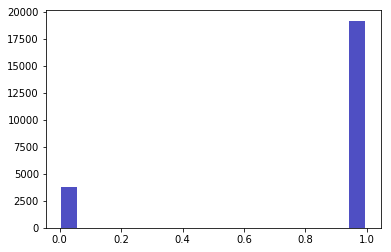

In [61]:
n, bins, patches = plt.hist(x=x1, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

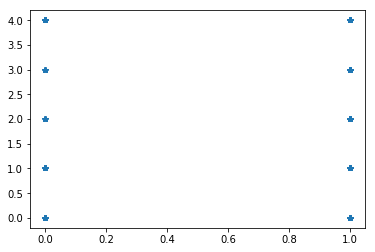

In [63]:
plt.plot(x1, y1,'*')